In the initial, we are installing some libraries in our model folder using a command line like git bash.<br>
downloading modules from requirement.txt files<br>
Modules are PyWavelets, opencv-python, seaborn

* importing numpy library for using high level mathematical functions
* importing cv2 for using openCV
* importing matplotlib for visualisation of the data and images
* importing pyplot to plot the data
* %matplotlib_inline will make our plot outputs appear and be stored within the notebook.

In [25]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


Reading an image using the cv2 function and getting the shape as the coordinates, the x and y coordinates of the image and the rgb channel coordinate for the image color

In [26]:
img=cv2.imread('./test_images/kohli1.jpg')
img.shape

(720, 1280, 3)

Using the function imshow to show the colorful image below

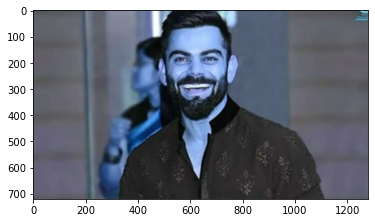

In [27]:
plt.imshow(img)

Also, we can get the same image in the gray color by eliminating the last corrdinate which we obtained just above, we will get the coordinates for gray only

In [28]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img.shape

(720, 1280)

Printing the whole 2d matrix consisting of the color codes of rgb, ranging from 0 to 255, considering every partition/pixel of the image

In [29]:
gray_img

array([[ 87,  87,  87, ..., 117, 120, 125],
       [ 87,  87,  87, ..., 121, 126, 131],
       [ 87,  87,  87, ..., 142, 148, 153],
       ...,
       [ 96,  96,  96, ...,  98,  98,  98],
       [ 96,  96,  96, ...,  97,  97,  97],
       [ 96,  96,  96, ...,  97,  97,  97]], dtype=uint8)

Printing the image in gray format 

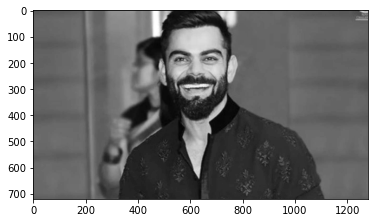

In [30]:
plt.imshow(gray_img,cmap='gray')

Now, we will detect the face and eyes of this image, for this we will use Haar Cascade of openCV for this work.<br>
Mainly openCV (openComputerVision) is used for realtime computer vision, or we can say that image identification and processing.
It was originally developed by Intel, it is open source, written in C++.<br>
Using Haar cascade for face and eyes detection, a popular library in openCV used for object detection.<br>
It creates a lot of positive and negative images which are used to train the classifier.<br>
The deeper explaination about how this haar cascade works is available on the openCV website


Now, we will import all the haar cascade files from their official github repository and store them in our opencv folder<br>
Below, we are using the haar cascade face detection and eye detection code<br>
The output will give us the two coordinates which mentions about the plotted coordinates for the face boundaries

In [31]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# this function is meant to detect face from a gray image
faces= face_cascade.detectMultiScale(gray_img,1.3,5)
faces

# this will print the face boundaries in the form of an array

array([[481,  70, 289, 289]])

storing these coordinates in x,y,w,h variables for using it further

In [32]:
(x,y,w,h)=faces[0]
x,y,w,h

(481, 70, 289, 289)

Now, we will create a boundary or we can say that a rectangle around our face of the image which the haar cascade has identified and returned us the coordinates.<br>
the function .rectangle(image_name,x coordinate, y coordinate, x+w, y+h, rgb colorCodeOfBoundary,thicknessOfBoundary)

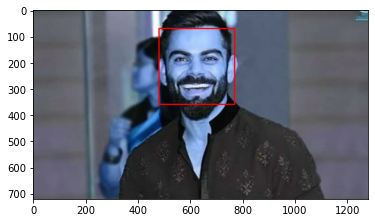

In [33]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

Now, we will identify the eyes in this image using the eye_cascade function which works in similar way like face_cascade.<br>
Combining both the eye and face cascade in a single code statement and getting the results

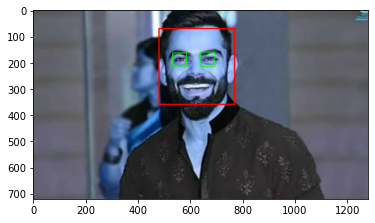

In [34]:
# this code has been picked from the openCV official documentation
# closing all the previous code
cv2.destroyAllWindows()
# traversing over all the images and their coordinates
for (x,y,w,h) in faces:
    # we are drawing our face image with red color border
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # creating a gray image of our face image
    roi_gray=gray_img[y:y+h, x:x+w]
    # creating a color image of our face image
    roi_color=face_img[y:y+h, x:x+w]
    # using eye cascade over our gray image to identify the eyes present in it
    eye_rect = eye_cascade.detectMultiScale(roi_gray,
                                            scaleFactor = 1.2,
                                            minNeighbors = 5)   
    for (x, y, w, h) in eye_rect:
        cv2.rectangle(roi_color, (x, y),
                      (x + w, y + h), (0, 255, 0), 2)     
#     eyes=eye_cascade.detectMultiScale(roi_gray)
#     for(ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

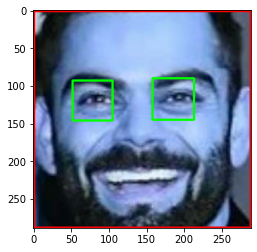

In [35]:
# printing our identified image

%matplotlib inline
plt.imshow(roi_color,cmap='gray')

Now, we will create a generic function which will pick up an image, do hars cascade over it and identify the face and eyes region on our image, then provide us a cropped area of our region of interest(The image we have taken).

In [37]:
# defining the function which will take an image path as an argument
# after reading the image, it will take the path in an img variable
# getting the gray image of the original and obtaining the faces from this gray image using the face_cascade from hars cascade
# traversing over the face coordinates and getting the gray region and color region, alongwith identifying the eyes using the eye cascade
# if the obtained eyes>=2, means this image has an identified face and eyes so return the image at last

# our generic function declaration
def get_cropped_image_if_2_eyes(image_path):
    # reading and storing our image in img from image_path
    img=cv2.imread(image_path)
#     print(img)
    # obtaining the gray image from the original
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # detection of faces from the gray image using haar cascade
    faces=face_cascade.detectMultiScale(gray,1.2,5)
    # traversing over all those face coordinates which we have obtained above
    for(x,y,w,h) in faces:
        # obtaining the gray image of the face region
        roi_gray=gray[y:y+h,x:x+w]
        # obtaining the color image of the face region
        roi_color=img[y:y+h,x:x+w]
        # applying haar cascade on this gray image and if eyes are present
        eyes=eye_cascade.detectMultiScale(roi_gray)
        # if identified eyes are >=2, return the color image 
        if len(eyes)>=2:
            return roi_color

Getting the original image and showing it as usual first 

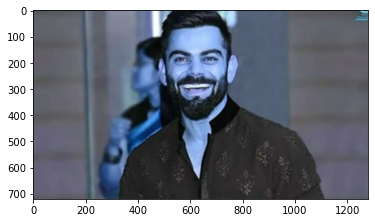

In [38]:
original_image=cv2.imread('./test_images/kohli1.jpg')
plt.imshow(original_image)

Now, using the function we have defined earlier, and showing the cropped area which has been identified by the eyes and face cascade

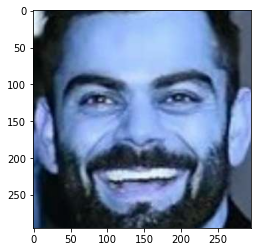

In [39]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/kohli1.jpg')
plt.imshow(cropped_image)

Now, what if the taken image is not clearly visible for the cascade to identify the eyes and face??<br>
Let's load another image which is being obstructed enough to not being classified in this process.

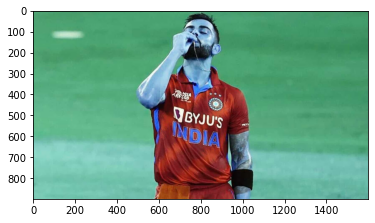

In [40]:
obstructed_image=cv2.imread('./test_images/kohli3dis.jpg')
plt.imshow(obstructed_image)

In [41]:
# As we mentioned, it won't work
cropped_image=get_cropped_image_if_2_eyes('./test_images/kohli3dis.jpg')
cropped_image

# IT GAVE US NO RESULT, SEE!!!

Now, our next task will be to create a folder "cropped", which will have all the cropped images returned from the function above


In [42]:
# current directory
path_to_data='./dataset/'
# directory which we are gonna create or store our cropped images
path_to_cr_data='./dataset/cropped/'

In [44]:
# we will use a python os module to create, read and update directories
# currently, we are storing the folder names which we have created earlier
# of our Youtubers/Instagram Personalities in an array

import os
img_dirs=[]
# scanning all directories from path to data or './dataset' folder
for entry in os.scandir(path_to_data):
    # if there is some folder
    if entry.is_dir():
        # add this directory address to img_dirs array
        img_dirs.append(entry.path)
        

In [45]:
# printing the names of the directories
img_dirs

['./dataset/arijit_singh',
 './dataset/carry_minati',
 './dataset/cristiano_ronaldo',
 './dataset/cropped',
 './dataset/deepika_padukone',
 './dataset/indian_hacker',
 './dataset/kapil_sharma',
 './dataset/pew_die_pie',
 './dataset/sandeep_maheshwari',
 './dataset/technical_guruji',
 './dataset/virat_kohli']

In [46]:
# if the cropped folder is already created, remove it, else create a new folder
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

Now, at this stage, we are gonna do a very crucial task which involves work like<br>
- traversing over the folders one by one and then traversing the data they have
- creating a dictionary which will store celebrity names
- for every image we are traversing over, we will do eye and face hars cascade over it using our predefined function and we will obtain a roi colored image 
- if the returned image is not null, means we have identified a new face which we are gonna store now
- before storing this image, first we will create a new directory which will actually have that particular celebrity all hars cascade image going through this process and then we will store the cropped images in that particular folder
- Also, we are giving the image name as celebrity_name(count) and extension as .png for our convenience during the further process

In [47]:

# getting the cropped face images of our celebrities from the folder names one by one

# creating a new array which will store the directory names of the celebrities
# whose faces has been cropped in a new folder
cropped_image_dirs=[]

# creating a new dictionary having the names of our celebrities with their values
celebrity_file_names_dict={}

# traversing the img_dir array which has all our folder directory addresses
for img_dir in img_dirs:
    # using a count variable to provide a unique name to every cropped image
    # we are getting, like 'ronaldo35.png'
    count=1
    # getting the celebrity name from the directory name
    # -1 will give the last value which is actually our celebrity name
    celebrity_name=img_dir.split('/')[-1]
    
    # if the folder name is cropped, we are gonna ignore it as we can't do
    # cropping on the same folder in which we are storing our images
    # its an obvious logic to ignore it
    if celebrity_name == 'cropped':
      continue
    
    # printing the celebrity name
    print("CELEBRITY NAME : "+celebrity_name)
    
    
    # initialising the dictionary with first celebrity name
    #with no image values in initial
    celebrity_file_names_dict[celebrity_name]=[]
    
    # traversing every image 
    for entry in os.scandir(img_dir):
        # printing the image path
        print(entry.path)
        
        # getting the face and eyes identified cropped  colored image
        roi_color=get_cropped_image_if_2_eyes(entry.path)
#         roi_color=1
        # if image is identified and not null, enter the if statement
        if roi_color is not None:
            # cropped folder new address
            cropped_folder=path_to_cr_data+celebrity_name
            # if this new folder doesn't exist, create a new one with 
            # this new address and add its address name 
            # into our cropped_image_dirs folder
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            # generating the cropped file name as {Name}{Value}.{extension}
            # ex "deepika4.png"
            cropped_file_name=celebrity_name+str(count)+".png"
            # also, generating the cropped file path by adding the foldername+"/"+"celebrity name"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            
            # this will save our roi_color (our cropped identified colored image)
            # in our cropped folder.
            cv2.imwrite(cropped_file_path,roi_color)
            # adding the file in the dictionary of that corresponding celebrity
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            # incrementing count for the next image
            count=count+1
            
# below, we are seeing that the function is traversing over 
# all the images we have in our dataset and storing the cropped images
# in the background


CELEBRITY NAME : arijit_singh
./dataset/arijit_singh\40 Soulful Tracks By Arijit Singh For.jpg
./dataset/arijit_singh\5 Most Underrated Songs Of Arijit Singh.jpg
Generating cropped images in folder:  ./dataset/cropped/arijit_singh
./dataset/arijit_singh\9 Unknown Facts About Arijit Singh.jfif
./dataset/arijit_singh\925934652-7096502-1.jpg
./dataset/arijit_singh\arijit concerts.jpg
./dataset/arijit_singh\arijit home decors INDIA TIMES.jpg
./dataset/arijit_singh\arijit iifaa.jpg
./dataset/arijit_singh\arijit interview NBT.jpg
./dataset/arijit_singh\arijit live statge.jpg
./dataset/arijit_singh\Arijit Singh (_arijitsingh)   Twitter.jpg
./dataset/arijit_singh\Arijit Singh - Biography_ Height & Life.jpg
./dataset/arijit_singh\Arijit Singh - BollywoodMDB.jpg
./dataset/arijit_singh\Arijit Singh - IMDb.jpg
./dataset/arijit_singh\Arijit Singh - Practice Session Song.jpg
./dataset/arijit_singh\Arijit Singh - Wikipedia.jpg
./dataset/arijit_singh\Arijit Singh all set to turn music.jpg
./dataset/ar

./dataset/carry_minati\Helping Pulwama Attack Survivors.jpg
./dataset/carry_minati\Here_s what Ajey Nagar aka Carry Minati.jpg
./dataset/carry_minati\Interesting facts about CarryMinati.jpeg
./dataset/carry_minati\Kareena Kapoor And CarryMinati Talk.jpg
./dataset/carry_minati\Meet Carryminati_ The Only Indian.jpg
./dataset/carry_minati\moodoff.jpg
./dataset/carry_minati\Pin on Carryminati and other youthoobers.jpg
./dataset/carry_minati\Post YouTube Drama_ CarryMinati Shares.jpg
./dataset/carry_minati\Roast Destroys TikToker Amir Siddiqui.jpeg
./dataset/carry_minati\Roasting Bigg Boss 14 Contestants.jpg
./dataset/carry_minati\Runway 34_ CarryMinati Reveals Why Ajay.jpg
./dataset/carry_minati\Runway 34_ YouTuber CarryMinati on why.jpg
./dataset/carry_minati\smileee.jpg
./dataset/carry_minati\THE SUCCESS STORY OF DEEPAK CHAR_ THE.jpg
./dataset/carry_minati\What is the biography of Carry Minati.jpg
./dataset/carry_minati\white suit ajey.jpg
./dataset/carry_minati\Who Is CarryMinati AKA Aj

./dataset/cristiano_ronaldo\ronaldo.jpg
./dataset/cristiano_ronaldo\ronaldooo.jpg
./dataset/cristiano_ronaldo\ronaldooooo.jpg
./dataset/cristiano_ronaldo\striker Cristiano Ronaldo.jpg
./dataset/cristiano_ronaldo\The Daily Bee_ Borussia Dortmund Linked.jpg
./dataset/cristiano_ronaldo\The day Cristiano Ronaldo declared his.jpg
./dataset/cristiano_ronaldo\The decline of Cristiano Ronaldo.jpg
./dataset/cristiano_ronaldo\Why Bayern Munich rejected Cristiano.jpg
./dataset/cristiano_ronaldo\Why Cristiano Ronaldo is called CR7.jpg
./dataset/cristiano_ronaldo\Why isn_t Cristiano Ronaldo playing.png
CELEBRITY NAME : deepika_padukone
./dataset/deepika_padukone\Actor Deepika Padukone Is Launching 5.jpg
Generating cropped images in folder:  ./dataset/cropped/deepika_padukone
./dataset/deepika_padukone\Cannes Film Festival jury 2022.png
./dataset/deepika_padukone\Confusing_ Reply at Cannes.jpg
./dataset/deepika_padukone\Deepika Padukone (1).jpg
./dataset/deepika_padukone\Deepika Padukone (_deepikapa

./dataset/indian_hacker\mr indian hacker channel youtuber.jpg
./dataset/indian_hacker\Mr indian hacker Income_ Net worth.jpg
./dataset/indian_hacker\Mr Indian Hacker Success Lifestyle 2022.png
./dataset/indian_hacker\Mr Indian Hacker YouTuber Dilraj Singh.jpg
./dataset/indian_hacker\MR Indian Hacker) Dilraj (1).jfif
./dataset/indian_hacker\MR Indian Hacker) Dilraj.jfif
./dataset/indian_hacker\Mr Indian hacker.jpeg
./dataset/indian_hacker\Mr. Indian hacker (Dilraj Singh Rawat.jpg
./dataset/indian_hacker\Mr. Indian Hacker (Dilraj Singh) Age.jpg
./dataset/indian_hacker\MR. INDIAN HACKER (_MR_INDIANHACKER (1).jpg
./dataset/indian_hacker\MR. INDIAN HACKER (_MR_INDIANHACKER (2).jpg
./dataset/indian_hacker\MR. INDIAN HACKER (_MR_INDIANHACKER (3).jpg
./dataset/indian_hacker\MR. INDIAN HACKER (_MR_INDIANHACKER.jpg
./dataset/indian_hacker\Mr. Indian Hacker - WWW.ACNTIMES.COM.jpg
./dataset/indian_hacker\Mr. Indian Hacker Biography In Hindi.jpg
./dataset/indian_hacker\Mr. Indian Hacker YouTube Cha

./dataset/pew_die_pie\pdp.jpg
./dataset/pew_die_pie\PewDiePie (English Interview) _ _I sold.jpg
./dataset/pew_die_pie\PewDiePie - Age_ Family_ Bio _ Famous.jpg
./dataset/pew_die_pie\PewDiePie - Wikipedia (1).jpg
./dataset/pew_die_pie\PewDiePie - Wikipedia.jpg
./dataset/pew_die_pie\PewDiePie - YouTube (1).jpg
./dataset/pew_die_pie\PewDiePie - YouTube.jpg
./dataset/pew_die_pie\PewDiePie 2.jpg
./dataset/pew_die_pie\PewDiePie allegedly got shadowbanned on.jpg
./dataset/pew_die_pie\PewDiePie Announced He_s Taking a Break.png
./dataset/pew_die_pie\PewDiePie Apologises Over Racial Slur.jpg
./dataset/pew_die_pie\PewDiePie Birthday - National Today.jpg
./dataset/pew_die_pie\PewDiePie faces backlash for appearing.jpg
./dataset/pew_die_pie\Pewdiepie Has QUIT YouTube.jpg
./dataset/pew_die_pie\Pewdiepie hi-res stock photography and.jpg
./dataset/pew_die_pie\PewDiePie Is A Sore Loser After Losing.jpg
./dataset/pew_die_pie\Pewdiepie Is Back From 30 Day Hiatus.jpg
./dataset/pew_die_pie\PewDiePie is Ta

./dataset/sandeep_maheshwari\Sandeep Maheshwari Net Worth 2022.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Net Worth_ Income.jpg
./dataset/sandeep_maheshwari\sandeep maheshwari on podcast.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Profile Biography.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes (1).jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes (2).jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes in hindi(2021 (1).jfif
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes in hindi(2021.jfif
./dataset/sandeep_maheshwari\sandeep maheshwari quotes Matte Finish.jpeg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Quotes_ Quotes of.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari shared a photo on.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Sir aatmmnthn.png
./dataset/sandeep_maheshwari\Sandeep Maheshwari Videos.jpg
./dataset/sandeep_maheshwari\Sandeep Maheshwari Vs Dr. 

./dataset/technical_guruji\Technical Guruji(Gaurav Chaudhary.png
./dataset/technical_guruji\Technical guruji--Gaurav Chaudhary.jpg
./dataset/technical_guruji\Technical Guruji_ 10M_ Subscribers.jpg
./dataset/technical_guruji\Technical-Guruji-Best-Indian-Youtubers.jpg
./dataset/technical_guruji\Technical-Guruji-Top-YouTubers-Of-India.jpg
./dataset/technical_guruji\tg.jpeg
./dataset/technical_guruji\The story of Technical Guruji who.jfif
./dataset/technical_guruji\The story of the technical guruji who.jpeg
./dataset/technical_guruji\Top Tech YouTube channel in hindi.jpg
./dataset/technical_guruji\Top Technological YouTubers In India.jpg
./dataset/technical_guruji\Twitter as YouTuber deletes TikTok.jpeg
./dataset/technical_guruji\vintage gaurav.jpg
./dataset/technical_guruji\Who is Technical Guruji_ - Quora.jpg
./dataset/technical_guruji\World_s largest Hindi tech channel.jpg
./dataset/technical_guruji\Yaar Shame_ Watch full video.jpg
./dataset/technical_guruji\Youtuber Technical Guruji.jp

After this code, we will have all the cropped images we have after the haar cascade

In the end, we will do a manual cleaning over our cropped images as there can be some unncessary or unwanted images we can get after this process and we have to remove those images for better accuray and precision <br>
Basically, this haar cascade identifies the faces of the people present in the image, but we are only taking 10 classes of our celebrities so all those images who arent the part of our selected celebrities has to be eliminated, but this algorithm can't find our desired faces in advanced and skip the unwanted images, so we have to do a manual cleaning over the cropped folder.

Manually examining cropped folder and deleting the unwanted images from them, after it running the function we have below

In [61]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'arijit_singh': ['./dataset/cropped/arijit_singh\\arijit_singh1.png',
  './dataset/cropped/arijit_singh\\arijit_singh10.png',
  './dataset/cropped/arijit_singh\\arijit_singh11.png',
  './dataset/cropped/arijit_singh\\arijit_singh12.png',
  './dataset/cropped/arijit_singh\\arijit_singh13.png',
  './dataset/cropped/arijit_singh\\arijit_singh14.png',
  './dataset/cropped/arijit_singh\\arijit_singh15.png',
  './dataset/cropped/arijit_singh\\arijit_singh16.png',
  './dataset/cropped/arijit_singh\\arijit_singh17.png',
  './dataset/cropped/arijit_singh\\arijit_singh18.png',
  './dataset/cropped/arijit_singh\\arijit_singh19.png',
  './dataset/cropped/arijit_singh\\arijit_singh2.png',
  './dataset/cropped/arijit_singh\\arijit_singh20.png',
  './dataset/cropped/arijit_singh\\arijit_singh21.png',
  './dataset/cropped/arijit_singh\\arijit_singh23.png',
  './dataset/cropped/arijit_singh\\arijit_singh24.png',
  './dataset/cropped/arijit_singh\\arijit_singh25.png',
  './dataset/cropped/arijit_singh\

Now, after this process<br>
We are gonna do wavelet transform, a kind of algorithm to detect facial expressions like eyes, nose, lips, etc.<br>


Actually, wavelet transform help us to detect important facial features and its is also very supportive and reliable, as it is one of the most effective way of getting facial features.


In [64]:
# importing wavelet transform library pywt, numpy and cv2
import numpy as np
import pywt
import cv2

#wavelet transfromation function
#  inputting an image
def w2d(img, mode='haar',level=1):
    imArray=img
    # Datatype conversions
    # convert to grayscale
    imArray= cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # converting to float value
    imArray=np.float32(imArray)
    imArray/=255;
    #computing coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    # returning a new image which is our wavelet transform
    return imArray_H
    

Now, using a new original image, then cropping it and then providing it to our wavelet transform function

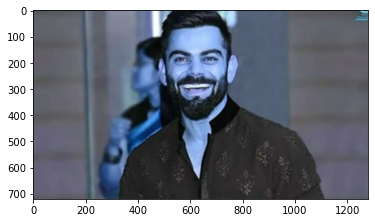

In [65]:
  original_image=cv2.imread('./test_images/kohli1.jpg')
plt.imshow(original_image)

Cropping our image using the predefined tutorial

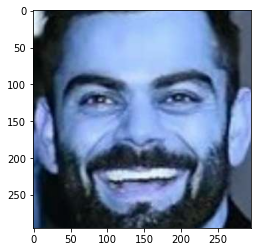

In [66]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/kohli1.jpg')
plt.imshow(cropped_image)

After doing a wavelet transformation on our image, it will look something like this<br>
Yes this is not very great image for a human to see, but the same image is a great data for a computer to compute and provide us our desired results.

This image is very important for the computer as these black and white regions are actually a kind of detail for the computer for feature detections

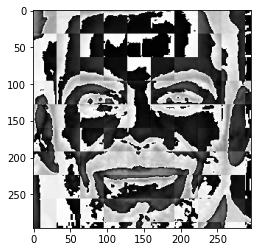

In [67]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

Now, the same thing, doing a wavelet transform over all the cropped images and storing them<br>
first printing the dictionary of key value pairs where celebrity is the key and values are its cropped face images

In [68]:
celebrity_file_names_dict

{'arijit_singh': ['./dataset/cropped/arijit_singh\\arijit_singh1.png',
  './dataset/cropped/arijit_singh\\arijit_singh10.png',
  './dataset/cropped/arijit_singh\\arijit_singh11.png',
  './dataset/cropped/arijit_singh\\arijit_singh12.png',
  './dataset/cropped/arijit_singh\\arijit_singh13.png',
  './dataset/cropped/arijit_singh\\arijit_singh14.png',
  './dataset/cropped/arijit_singh\\arijit_singh15.png',
  './dataset/cropped/arijit_singh\\arijit_singh16.png',
  './dataset/cropped/arijit_singh\\arijit_singh17.png',
  './dataset/cropped/arijit_singh\\arijit_singh18.png',
  './dataset/cropped/arijit_singh\\arijit_singh19.png',
  './dataset/cropped/arijit_singh\\arijit_singh2.png',
  './dataset/cropped/arijit_singh\\arijit_singh20.png',
  './dataset/cropped/arijit_singh\\arijit_singh21.png',
  './dataset/cropped/arijit_singh\\arijit_singh23.png',
  './dataset/cropped/arijit_singh\\arijit_singh24.png',
  './dataset/cropped/arijit_singh\\arijit_singh25.png',
  './dataset/cropped/arijit_singh\

Before that, we are gonna assign a specific number to our celebrities like carryminati-1, cristianoRonaldo-2,etc.

In [69]:
# creating a class dictionary 
# which will have celebrity names and index values like 1, 2, 3, etc
class_dict={}
# creating a count variable which is actually an index
count=0
# traversing every celebrity name and
# pushing it to the dictionary alongwith its index
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'arijit_singh': 0,
 'carry_minati': 1,
 'cristiano_ronaldo': 2,
 'deepika_padukone': 3,
 'indian_hacker': 4,
 'kapil_sharma': 5,
 'pew_die_pie': 6,
 'sandeep_maheshwari': 7,
 'technical_guruji': 8,
 'virat_kohli': 9}

In [70]:
x=[]
y=[]
# y is the celebrity name, or we can say the number
# we have assigned for the celebrity

# first we are traversing over all celebrity names folder
for celebrity_name, training_files in  celebrity_file_names_dict.items():
    # second we are traversing over the images we have in the folder
    for training_image in training_files:
        # reading the image using openCV
        img=cv2.imread(training_image)
        # if image doesn't exists then continue
        if img is  None:
            continue
        # scalling the image as raw in 32x32 size image
        scalled_raw_img=cv2.resize(img,(32,32))
        # doing wavelet transform image on the raw image we obtained
        img_har=w2d(img,'db1',5)
        # scalling the har image also
        scalled_img_har=cv2.resize(img_har,(32,32))
        #combining both images and scalling them as 32*32
        # also stacking them one over another using numpy function vstack
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        # adding this image in combined_img dict
        x.append(combined_img)
        # adding the celebrity name in class_dict
        y.append(class_dict[celebrity_name])
        
# at the end, we have our x and y ready for the model training

In [88]:
# length of x, means the total number of images 
len(x)

514

In [73]:
# size of every image we have
len(x[0])

# why is it 4096 but??
 
    # because 32*32*3+ 32*32*1  is equals to 4096 
    # 32 is the length, 32 is the width, 3 is the rgb color code for our original image
    # 32 is the length, 32 is the width, 1 is the black and white color code for our wavelet transform image


4096

In [74]:
# changing the shape of the array by x,y which is 514, 4096, means 514 images with 4096 data points
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(514, 4096)

Now, these images are reperesented as float number, like our first image in x[0]

In [77]:
x[0]

array([103.,   0.,  57., ..., 254., 213., 212.])

### Now, after completing the Data cleaning, now its time to train our model

We will use svm(support vector machines) to train our models, svm machines perform good in case of classification models.
We first try the svm, see the performance of our model, use gridsearch cv on it and hypertune it as well and at the end, selecting one model among various algorithms and saving it in a file

In [89]:
#importing files for training our model

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [90]:
# it is a standard practice to divide
# our x and y sets into train and tests for the model training
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state=0)

# we are scaling our xtrain and ytrain and providing it to svc
# using the standard scaler, and randomly choosing this parameter.
pipe= Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel='rbf',C=10))])

# this function will train our model on x and y train model
pipe.fit(x_train, y_train)

# get the score of the testing of our model after getting trained
pipe.score(x_test, y_test)

0.689922480620155

In [91]:
# we tested 129 images and it gave us 68% score.
len(x_test)

129

In [92]:
# giving the deeper level detail/statistics of 
# the trained result of our model classification
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.60      0.75      0.67        12
           2       0.64      0.54      0.58        13
           3       0.71      0.80      0.75        15
           4       0.86      0.46      0.60        13
           5       0.50      0.55      0.52        11
           6       0.74      0.85      0.79        20
           7       0.68      0.81      0.74        21
           8       0.80      0.80      0.80        10
           9       1.00      0.67      0.80         6

    accuracy                           0.69       129
   macro avg       0.71      0.66      0.67       129
weighted avg       0.70      0.69      0.68       129



Now, we will use gridsearch to try our different models with different parameters. Our goal is to come up with best model with best fine hypertuned parameters

In [93]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [94]:
# here we are defining different candidate models like svm, randomForest and logistic regression
# in every model we have provided different parameters
# it creates a dictionary of models with parameters passed in it
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [96]:
# in this code we are traversing every model from the dictionary we created above
# also we are creating a pipeline

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    # using pipeline to scale our model/data
    pipe = make_pipeline(StandardScaler(), mp['model'])
    # cv(crossvalidation) as 5 for only 5 iterations
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.729870,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.506494,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.768831,{'logisticregression__C': 1}


Now, we will recieve our three best esitmator models (which is actually our trained models with their corresponding accuracy)

In [97]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

Getting all three test set results from svm, rf and lr

In [98]:
best_estimators['svm'].score(x_test,y_test)

0.7674418604651163

In [99]:
best_estimators['random_forest'].score(x_test,y_test)

0.5503875968992248

In [100]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7674418604651163

In [101]:
# storing the result in our best classifier as LR is giving us the best score
best_clf=best_estimators['logistic_regression']

In [102]:
# receiving the result in a confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 4,  0,  0,  1,  0,  1,  0,  0,  2,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  1,  0,  0,  1,  0,  1,  0],
       [ 0,  1,  1, 12,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  2,  1,  8,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  6,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  1,  1,  0],
       [ 1,  0,  0,  1,  1,  0,  1, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

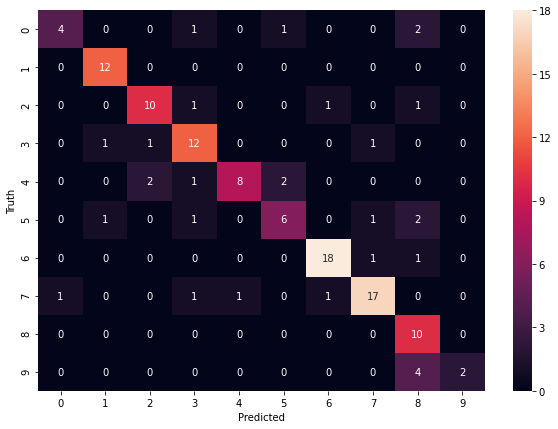

In [103]:
# visualising this confusion matrix in a 2d colored grid with clear details
# using seaborn for visualisation
import seaborn as sn
# plotting the figure as 10x7
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
# passing x and y labels as 'Predicted' and 'Truth'
plt.xlabel('Predicted')
plt.ylabel('Truth')

Save the trained model now

In [104]:
!pip install joblib
import joblib
# saving our model as a pickle in a file

joblib.dump(best_clf,'saved_model.pkl')

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 298.0/298.0 kB 2.6 MB/s eta 0:00:00


['saved_model.pkl']

Saving our class dictionary of our celebrity

In [106]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))